### Ch6 Figure1

In [1]:
# Think about your running shoe website. A data analyst should have little trouble finding websites that referred customers to the store. Let's say that most of your customers came from Twitter, Google and Facebook. There were also quite a few customers that came from running shoe websites. A good data analyst easily creates a report of the top 50 websites. These are websites that people visited just before buying. Trying to find out where people are coming from is a good analytics question. It's about gathering up the data, counting it and displaying it in a nice report.

referrals = ['facebook', 'google', 'amazon', 'twitter', 'slickdeals', 'instagram', 'pinterest', 'ebates', 'fitness magazine', 'discovery', 'youtube', 'messenger']
referral_type = ['organic', 'paid']
data = []

for i in range(1000):
    data.append([i, random_date(), referrals[rd.randint(0, len(referrals)-1)], referral_type[rd.randint(0, len(referral_type)-1)]])

df = pd.DataFrame(data, columns = ['id', 'timestamp', 'referral-site', 'referral-type'])
# df.to_csv('csv_output/ch6_fig1.csv', index=False)
df = pd.read_csv('csv_output/ch6_fig1.csv')
df.head()

,id,timestamp,referral-site,referral-type
0,0,2009-03-12 22:49:53,pinterest,paid
1,1,2009-03-26 13:56:06,slickdeals,organic
2,2,2009-03-08 15:00:06,google,paid
3,3,2009-03-17 05:17:07,google,paid
4,4,2009-03-18 14:48:54,google,paid


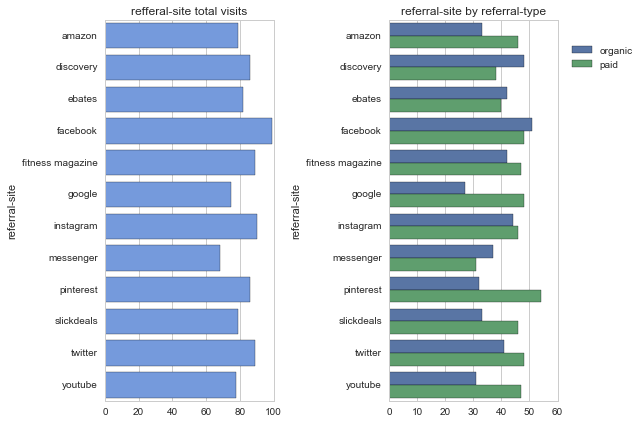

In [2]:
df = pd.read_csv('csv_output/ch6_fig1.csv')
site_count = df.groupby('referral-site').id.count().reset_index()
site_type_count = df.groupby(['referral-site', 'referral-type']).id.count().reset_index()

%matplotlib inline
sns.set_style("whitegrid")

f, ax = plt.subplots(1,2, figsize=(8,6))
sns.barplot(x='id', y='referral-site', data=site_count, ax=ax[0], color='cornflowerblue');
ax[0].set_title('refferal-site total visits')
ax[0].set_xlabel('')

sns.barplot(x='id', y='referral-site', hue='referral-type', data=site_type_count, ax=ax[1]);
ax[1].legend(loc='center right', bbox_to_anchor=(1.5, .9));
ax[1].set_title('referral-site by referral-type')
ax[1].set_xlabel('')

f.tight_layout()
f.savefig('svg_output/ch6_fig1.svg', format='svg', bbox_inches='tight')

Even though facebook, twitter and instagram seem to bring great traffic, but in terms of paid versus organic traffic, while pinterest drives comparable amount of traffic as other sites, but about half of them are paid advertisement.

In [3]:
%load_ext rpy2.ipython

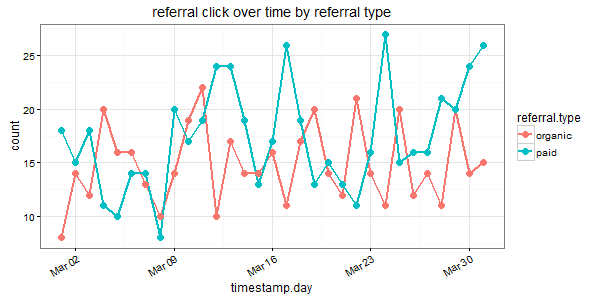

In [4]:
%%R -w 600 -h 300 -u px

require(dplyr)
df = read.csv('csv_output/ch6_fig1.csv')
head(df)

df$timestamp.formated = strptime(df$timestamp, "%Y-%m-%d %H:%M:%S")
df$timestamp.day = as.Date(format(df$timestamp.formated, "%Y-%m-%d"), "%Y-%m-%d")
df = df %>% select(-timestamp.formated)
by_day = df %>% group_by(timestamp.day, referral.type)
by_day_by_type = summarise(by_day, count=n())

require(ggplot2)
ggplot(by_day_by_type, aes(x=timestamp.day, y=count, group=referral.type, colour=referral.type)) + geom_line(size=1) + geom_point(size=3) + scale_x_date(date_labels = "%b %d") + ggtitle('referral click over time by referral type') + theme_bw() + theme(axis.text.x = element_text(angle = 30, hjust= 1))
# ggsave("svg_output/ch6_fig1_R.svg")